In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

# Get Data

In [3]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
x.T
data = []
for i in range(0,len(x.T)):
    data.append(x.T[i])
data.append(y)
data = np.array(data).T

"""
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
0 Iris Setosa
1 Iris Versicolour
2 Iris Virginica

"""
data[0:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

# Data Analysis

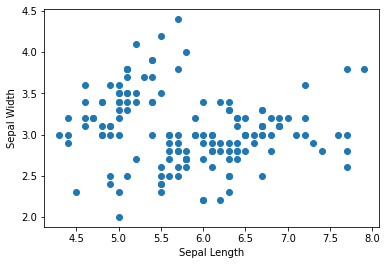

In [4]:
plt.scatter(data[:,0],data[:,1])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width");

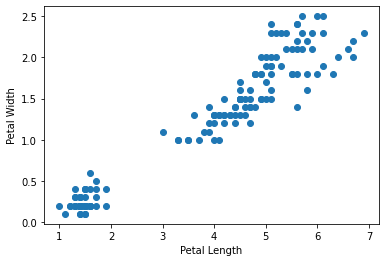

In [5]:
plt.scatter(data[:,2],data[:,3])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width");

# Preproccessing 

In [ ]:
np.random.shuffle(data)
train = data[:int(len(data)*.8)]
test = data[int(len(data)*.8):]

trainX = train[:,0:4]
trainY = train[:,-1]

testX = test[:,0:4]
testY = test[:,-1]

scaler = StandardScaler()
scaler.fit(trainX)
scaler.transform(trainX)

scaler2 = StandardScaler()
scaler2.fit(testX)
scaler2.transform(testX);



# Models

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
clf = SVC()
clf.fit(trainX,trainY)
predY = clf.predict(testX)
rmse = np.sqrt(mean_squared_error(testY, predY))
print("RMSE: " + str(rmse))

In [ ]:
clf = SVC(kernel = 'rbf')
clf.fit(trainX,trainY)
predY = clf.predict(testX)
rmse = np.sqrt(mean_squared_error(testY, predY))
print("RMSE: " + str(rmse))

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','sigmoid', 'rbf'), 'C':[1, 5, 10], 'gamma':['scale','auto']}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv = 5)
clf.fit(trainX,trainY)
df = pd.DataFrame(clf.cv_results_)
print("best parameters")
df[df['rank_test_score'] == 1]['params']

In [ ]:
clf = SVC(C = 1, gamma = 'scale', kernel = 'linear')
clf.fit(trainX,trainY)
predY = clf.predict(testX)
rmse = np.sqrt(mean_squared_error(testY, predY))
print("RMSE: " + str(rmse))
clf.score(testX,testY)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX,trainY)
neigh.score(testX,testY)

In [ ]:
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
svc = KNeighborsClassifier()
clf = GridSearchCV(svc, parameters, cv = 5)
clf.fit(trainX,trainY)
df = pd.DataFrame(clf.cv_results_)
print("best parameters")
df[df['rank_test_score'] == 1]['params']

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(trainX,trainY)
neigh.score(testX,testY)